### Importing Libraries

In [1]:
#import all required libraries
import pandas as pd
import time
import cv2 as cv
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

## ORB

In [2]:
datadir = 'Image_Classification'
class_labels = ['Cars', 'Ice cream cone', 'Cricket ball']

orb = cv.ORB_create()
orb_vectors = []
orb_labels = []

for label_index, class_label in enumerate(class_labels):
    for file in os.listdir(os.path.join(datadir, class_label)):
        if file.endswith('.jpg'):
            image = cv.imread(os.path.join(datadir, class_label, file))
            resized_image = cv.resize(image, (128,64))
            gray = cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)
            
            kp, des = orb.detectAndCompute(image, None)
            des = np.resize(des, (500,128))
            des = des.flatten()
            
            orb_vectors.append(des)
            orb_labels.append(label_index)
            
orb_vectors = np.array(orb_vectors)
orb_labels = np.array(orb_labels)
    
df = pd.DataFrame(orb_vectors)
df['orb_labels'] = orb_labels

In [3]:
# Separating the data into x and y sets
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Spliting into training and testing sets(for HOG)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(orb_vectors, orb_labels, test_size = 0.2, random_state = 0)

# Standardize the data
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## LogisticRegression

C:\Users\safi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 21.858 seconds
Actual Values [0 2 0 1 0 0 2 1 2 0 0 1 1 0 2 1 1 0 2 1 1 2 2 2 0 1 0 1 0 2 2 2 2 1 2 0 0
 1 1 1 0 1 2 1 2 2 2 0 2 2 2 2 2 0 0 0 0 2 0 1 0 1 1 0 0 2 1 1 2 2 1 2 0 0
 2 2 1 2 1 1 0 1 2 0 2 0 2 2 2 1 2 2 0 1 2 0 1 2 2 2 0 0 2 0 2 1 2 2 0 0 1
 1 0 0 2 0 0 2 0 2 0 2 1 0 0 2 0 2 1 1 0 2 2 0 2 2 0 0 2 1 0 1 0 0 1 0 2 1
 0 2 1 2 0 2 1 1 0 0 0 1 2 2 2 0 1 1 1 1 2 0 1 1 1 2 0 1 0 2 1 0 0 0 0 2 0
 2 1 1 2 0 2 1 0]
Predicted Values [0 0 0 1 2 0 2 0 2 0 2 1 1 2 1 1 1 0 0 1 1 2 2 0 0 1 0 1 0 2 2 2 2 1 2 0 0
 1 1 1 0 1 2 1 2 1 2 1 2 2 2 0 2 0 0 0 0 2 0 1 0 1 1 0 0 0 1 2 2 2 1 2 0 0
 2 0 1 0 1 1 0 1 1 0 2 0 2 2 0 1 2 2 0 1 2 0 1 2 2 2 0 0 2 0 2 1 2 2 0 0 1
 0 0 0 2 0 2 1 0 1 0 2 1 0 0 2 0 2 1 1 0 2 2 0 2 2 0 0 1 1 0 1 0 0 1 0 1 1
 0 2 1 2 0 2 1 1 0 0 0 1 2 2 0 0 1 1 1 1 2 0 1 1 1 0 0 1 0 0 1 2 0 2 0 2 0
 0 1 1 2 0 2 1 1]
Accuracy for training of  :  1.0
Accuracy Test time in Logistic Regression :  0.844559585492228
[[60  2  6]
 [ 2 52  1]
 [12  7 51]]


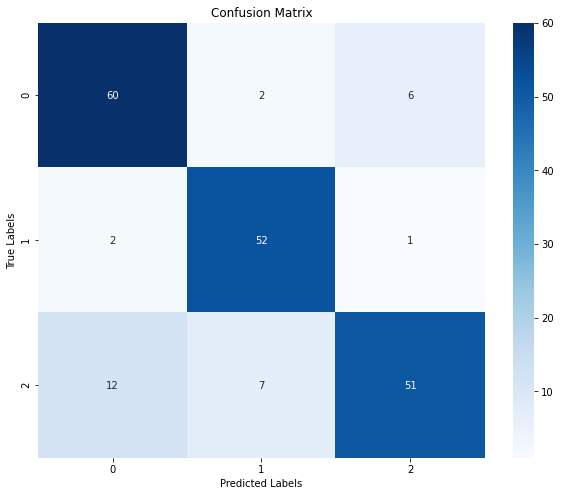

In [4]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()

start_time = time.time()    
classifier.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.3f} seconds".format(training_time))

y_train_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

print('Actual Values', y_test)
print('Predicted Values', y_pred)

print('Accuracy for training of  : ', accuracy_score(y_train, y_train_pred))
print('Accuracy Test time in Logistic Regression : ', accuracy_score(y_test, y_pred) )

# Cnfusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

## SupportVectorMachine

time complexity :43.884 
Traning Accuracy is :  1.0
Testing Accuracy is :  0.8290155440414507
[[58  3  7]
 [ 4 50  1]
 [12  6 52]]


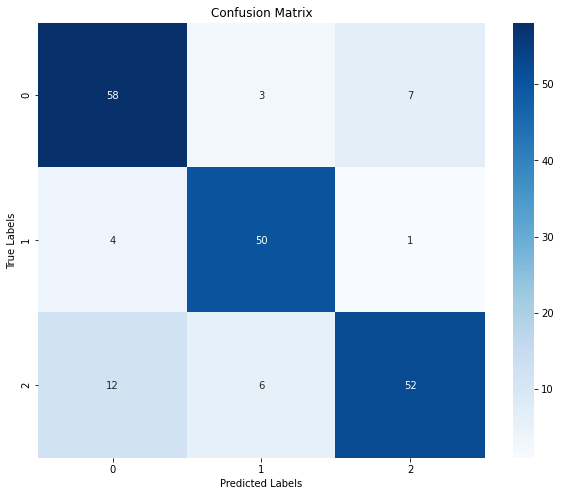

In [5]:
from sklearn.svm import SVC 

# Next we perform the step above of (data_Spliting and StandardScaler)

classifier = SVC(kernel = 'linear', random_state = 0)

start_time = time.time()
classifier.fit(x_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("time complexity :{:.3f} ".format(training_time))

y_pred_train = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

print('Traning Accuracy is : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy is : ', accuracy_score(y_test, y_pred))

# Now we can also find the cofusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

## DecisionTree

time complexity :38.060 
Training State Accuracy :  1.0
Testing state Accuracy :  0.42487046632124353
[[29 18 21]
 [13 25 17]
 [31 11 28]]


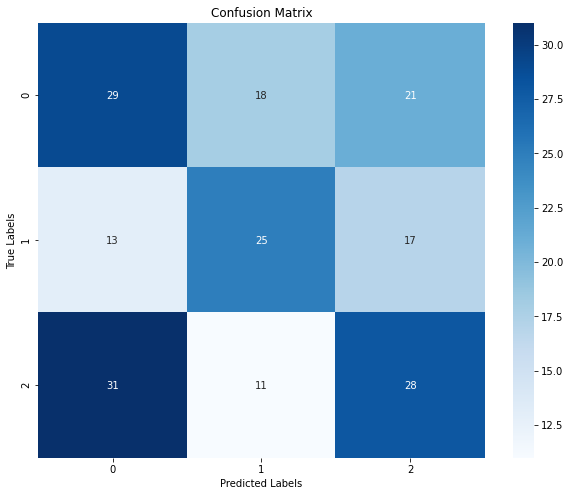

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'gini')

start_time = time.time()
tree.fit(x_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("time complexity :{:.3f} ".format(training_time))

y_train_pred = tree.predict(x_train)
y_pred = tree.predict(x_test)

print("Training State Accuracy : ", accuracy_score(y_train, y_train_pred))
print('Testing state Accuracy : ', accuracy_score(y_pred, y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

## RandomForest

time complexity :3.062 
Accuracy Rate during Training :  0.9830729166666666
Accuracy Rate during Testing :  0.5544041450777202
[[48  7 13]
 [ 9 34 12]
 [37  8 25]]


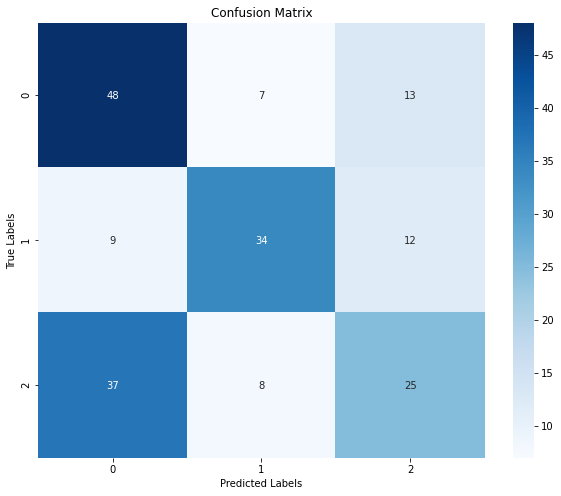

In [7]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10 ,criterion="entropy", random_state=0)

start_time=time.time()
forest.fit(x_train , y_train)
end_time=time.time()
training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))
forest.score(x_train, y_train)

y_train_pred = forest.predict(x_train)
y_pred = forest.predict(x_test)

print("Accuracy Rate during Training : ",accuracy_score(y_train_pred, y_train))
print("Accuracy Rate during Testing : ",accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test , y_pred)
print(confusion_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time

knn = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors

start_time = time.time()
knn.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Time complexity: {:.3f}".format(training_time))

y_train_pred = knn.predict(x_train)
y_pred = knn.predict(x_test)

print("Accuracy Rate during Training: ", accuracy_score(y_train_pred, y_train))
print("Accuracy Rate during Testing: ", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


Time complexity: 0.109
Accuracy Rate during Training:  0.7317708333333334
Accuracy Rate during Testing:  0.6217616580310881
[[16 19 33]
 [ 0 54  1]
 [ 9 11 50]]
